In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# 1a)

## (i)

In [32]:
def initialize(T,Ns):
    # makes a (T,Ns) array of x positions
    x=np.zeros((T,Ns),dtype=float)
    return x

def step(x,t,Ns,bias):
    # takes a step in one direction with a bias 
    bump=np.random.choice([-1,1],size=Ns,p=[1-bias,bias])
    x[t,:]=x[t-1,:]+bump
    return x

def walk(x,T,Ns,bias):
    # does the random walk and returns the array x
    # first position is always zero, so range runs from 1 -> T
    for t in range(1,T):
        # take a step and change x
        x=step(x,t,Ns,bias)
    return x

In [33]:
def main(T,Ns,bias):
    # main walk function
    x=initialize(T,Ns)
    x=walk(x,T,Ns,bias)
    # to read out a single sample i < Ns, use x[:,i]
    return x

## (ii)

In [34]:
Ns=500
T=1000
bias=0.6
xii=main(T,Ns,bias)

In [51]:
# define sample functions
# both of these will sample over the Ns dimension
# leaving us with a 1D array of dimension T
def sample_mean(a):
    # get number of samples
    NS=np.shape(a)[1]
    # sum over sample dimension, NOT T dimension
    mean=np.sum(a,axis=1)
    mean/=NS
    return mean

def sample_variance(a):
    # get number of samples
    NT,NS=np.shape(a)
    # get sample mean
    smean=sample_mean(a)
    # sum over sample dimension
    svar=np.zeros(NT)
    for i in range(NS):
        svar+=(a[:,i]-smean)**2
    svar/=NS-1
    return svar

In [52]:
xii_mean_Ns=sample_mean(xii)
xii_var_Ns=sample_variance(xii)

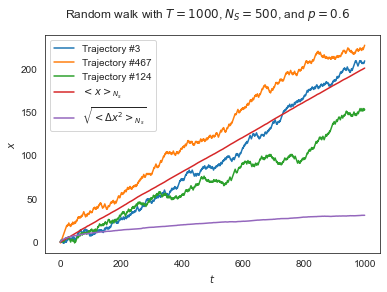

In [195]:
# make linspace of Ts
Tspace=np.arange(T)

# plot
plt.figure()
plt.suptitle("Random walk with $T=1000$, $N_S = 500$, and $p=0.6$")
# trajectories
representative_is=np.random.randint(Ns,size=3)
for i in representative_is:
    plt.plot(Tspace,xii[:,i],label='Trajectory #{}'.format(i+1))
plt.plot(Tspace,xii_mean_Ns,label=r'$<x>_{N_s}$')
plt.plot(Tspace,np.sqrt(xii_var_Ns),label=r'$\sqrt{<\Delta x ^2>_{N_s}}$')
plt.ylabel("$x$")
plt.xlabel("$t$")
plt.legend()
plt.show()



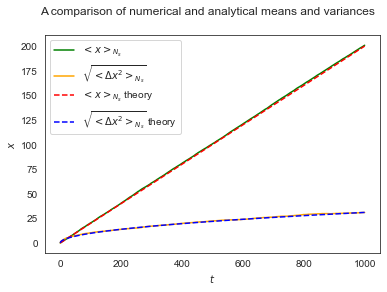

In [266]:
# theoretical fits
plt.figure()
plt.suptitle("A comparison of numerical and analytical means and variances")
# numeric
plt.plot(Tspace,xii_mean_Ns,label=r'$<x>_{N_s}$',c='g')
plt.plot(Tspace,np.sqrt(xii_var_Ns),label=r'$\sqrt{<\Delta x ^2>_{N_s}}$',c='orange')
# analytic
mean_theory=Tspace*(2*bias-1)
var_theory=(4*Tspace*bias*(1-bias))**(1/2)


plt.plot(Tspace,mean_theory,ls='--',label=r'$<x>_{N_s}$ theory',c='r')
plt.plot(Tspace,var_theory,ls='--',label=r'$\sqrt{<\Delta x ^2>_{N_s}}$ theory',c='b')
plt.ylabel("$x$")
plt.xlabel("$t$")
plt.legend()
plt.show()

Note the green line is partially hiddden behind the red dotted line, and the yellow line is partially hidden behind the blue dotted line.

## (iii)

In [211]:
# histogram 
hist_ts=[10,500,1000]
bins=[9,20,50]

In [249]:
def Gaussian(x,m,s):
    G=np.exp(-(x-m)**2/(2*s**2))
    G/=np.sqrt(2*np.pi)*s
    return G

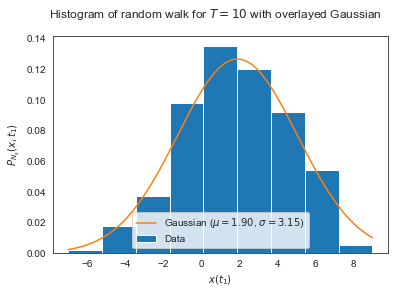

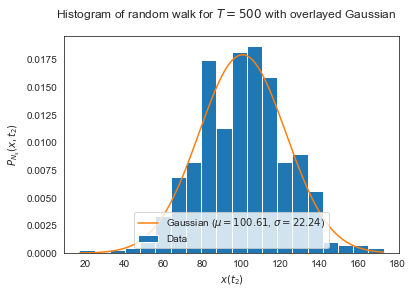

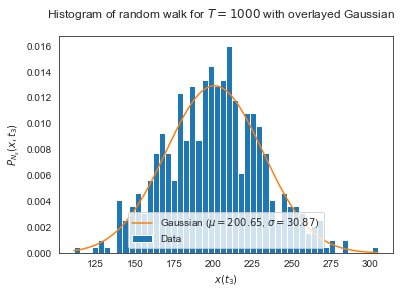

In [265]:
for i in range(len(hist_ts)):
    t=hist_ts[i]
    bini=bins[i]
    # for indexing
    t-=1
    # get mean and variance
    m=xii_mean_Ns[t]
    s=np.sqrt(xii_var_Ns[t])
    # no. of bins is sqrt of data size
    # make sure to normalize
    plt.figure()
    plt.suptitle("Histogram of random walk for $T={}$ with overlayed Gaussian".format(t+1))
    ret=plt.hist(xii[t,:],bins=bini,density=True,label="Data")
    edges=ret[1]
    Xspace=np.linspace(edges[0],edges[-1],num=1000)
    plt.plot(Xspace,Gaussian(Xspace,m,s),label="Gaussian ($\mu= {0:.2f}$, $\sigma = {1:.2f}$)".format(m,s))
    plt.ylabel(r"$P_{N_s}(x,t_{"+str(i+1)+"})$")
    plt.xlabel(r"$x(t_{"+str(i+1)+"})$")
    plt.legend(loc='lower center')
    plt.show()